In [1]:
import pickle
import pandas as pd
pd.set_option('display.max_colwidth', 200)

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

# WMT segment-level data

In the 2016 WMT data, each language pair had half translationese and half non-translationese.

In [2]:
wmt_mst_seg = pickle.load(open('./pickles/wmt_mst_seg_toen_scored.pkl', 'rb'))
wmt_mst_seg.head(1)

,lp,system,sid,sentBLEU,score,output,reference,source,year,bert_score,bleurt
560,ro-en,uedin-pbmt,851,0.133802,0.77061,Sometimes you do more harm if you bring in players who are not needed.\n,Sometimes more harm is done by adding unnecessary players to what you really need.\n,Uneori faci mai mult rău dacă aduci jucători care nu sunt necesari.\n,2016,0.923424,0.389199


In [3]:
groups = dict(i for i in wmt_mst_seg.groupby(['year', 'lp']))
groups.keys()

dict_keys([(2016, 'cs-en'), (2016, 'de-en'), (2016, 'fi-en'), (2016, 'ro-en'), (2016, 'ru-en'), (2016, 'tr-en'), (2017, 'cs-en'), (2017, 'de-en'), (2017, 'fi-en'), (2017, 'lv-en'), (2017, 'ru-en'), (2017, 'tr-en'), (2017, 'zh-en')])

In [4]:
wmt_mst_seg.groupby(['year', 'lp']).system.unique().apply(lambda x: len(x))

year  lp   
2016  cs-en     5
      de-en     9
      fi-en     8
      ro-en     6
      ru-en     9
      tr-en     7
2017  cs-en     4
      de-en    11
      fi-en     6
      lv-en     9
      ru-en     9
      tr-en    10
      zh-en    16
Name: system, dtype: int64

# Metric analysis

##### false-positives and false-negatives

In [5]:
groups = dict(i for i in wmt_mst_seg.groupby(['year', 'lp']))

In [6]:
def fp_and_fn(group, splits=10, q1=0.5, q2=0.2, metric='bert_score'):
    group = group.sort_values(metric)
    group['label'] = len(group) * [False]

    # false negatives
    group['low_score'] = group.score > group.score.quantile(q=q1)
    group['high_metric'] = group.bert_score < group.bert_score.quantile(q=q2)
    group['label'] = [ 'fn' if i else j for i, j in zip(group.low_score & group.high_metric, group.label) ]

    # false positives
    group['high_score'] = group.score < group.score.quantile(q=q2)
    group['low_metric'] = group.bert_score > group.bert_score.quantile(q=q1)
    group['label'] = [ 'fp' if i else j for i, j in zip(group.high_score & group.low_metric, group.label) ]

    g = sns.scatterplot(x=group.score, y=group.bert_score, hue=group.label)
    return group[['reference', 'output', 'score', metric, 'label']][group.label.isin(['fp', 'fn'])].sort_values('score', ascending=False)

### bert_score

##### scatterplots

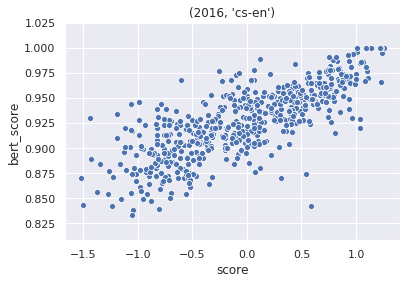

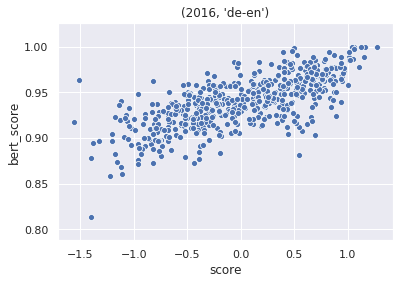

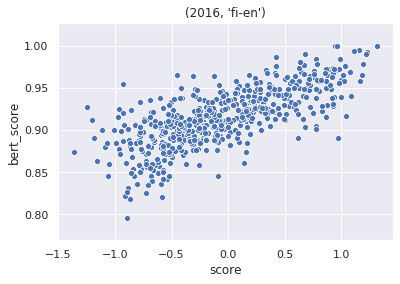

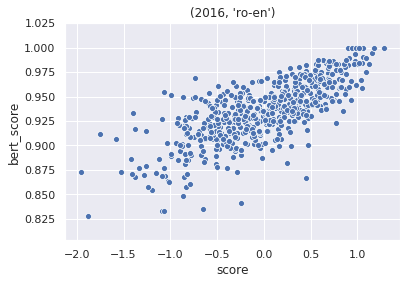

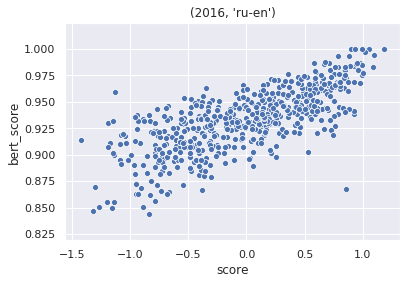

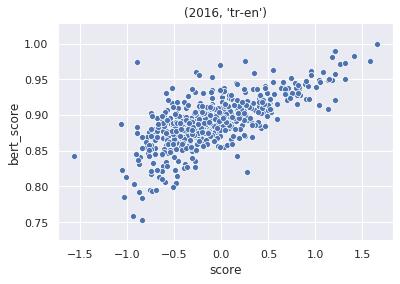

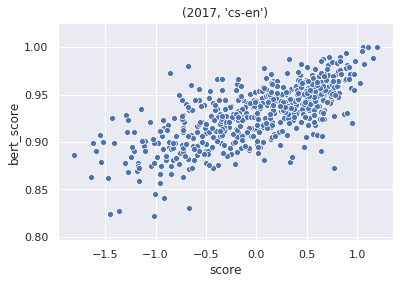

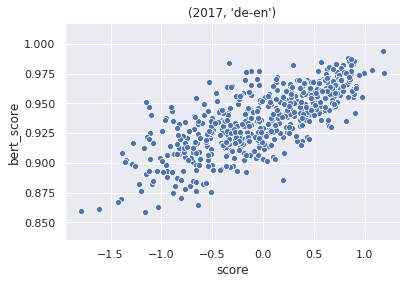

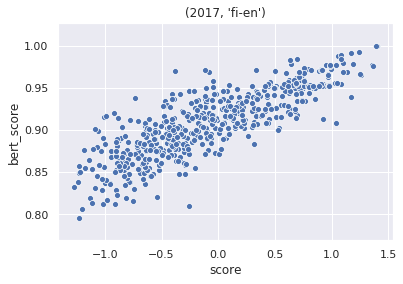

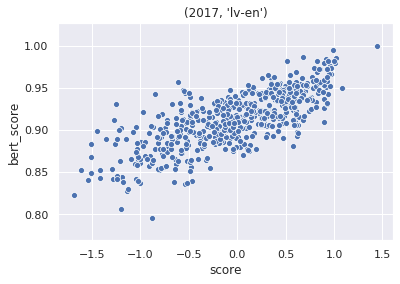

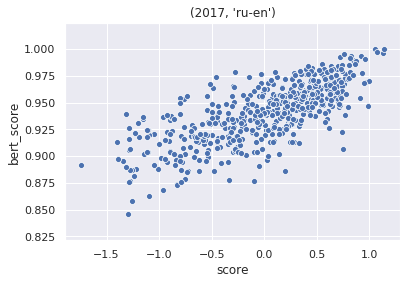

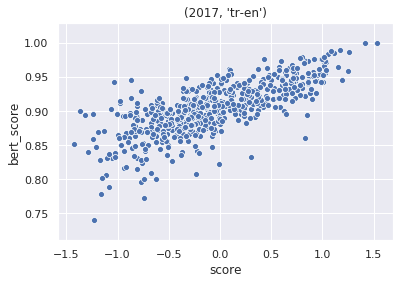

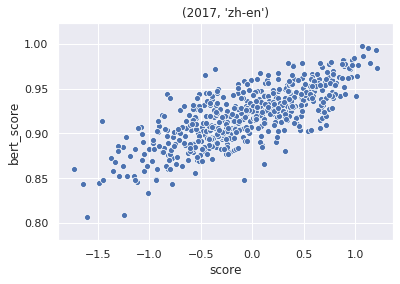

In [7]:
for i, group in wmt_mst_seg.groupby(['year', 'lp']):
    plt.figure()
    plt.title(str(i))
    sns.scatterplot(x=group.score, y=group.bert_score)

Observations:
* As the output gets worse, the scatter get wider (looking along the axis of correlation).
* As bert_score becomes lower, the spread/range of the human score gets larger (looking along the y-axis).

Hypotheses:
* bert_score doesn't learn how much edits should cost.
* bert_score is good at finding semantic matches.

,reference,output,score,bert_score,label
1357,Reporting By Yasmeen Abutaleb; Editing by Christian Plumb\n,Story: Yasmeen Abutaleb; edit: Christian Plumb\n,0.589889,0.842046,fn
1513,Not in English of course.\n,But it was not English.\n,0.537894,0.874459,fn
1530,Rumour Mill: No Celtic disharmony\n,Rumours: No discrepancy in team Celtic\n,0.312298,0.870358,fn
1369,"However, by 1991 it wasn't producing any.\n","But in, 1991, made not one.\n",0.220114,0.892817,fn
1217,Hughes was charged with three runs on six hits and a walk with four strikeouts.\n,"Hughes ran three bases, gained six hits and four strikes.\n",0.118796,0.880181,fn
1325,Having an exclusive status among suppliers to aviation manufacturers comes at a price.\n,Exclusive position between suppliers aircraft manufacturers is not free.\n,0.072905,0.876096,fn
1497,"Healy also backed the decision to overlook Kyrgios for the important tie, starting on Friday, describing the ""mutual decision"" as the right thing for all, but backing the Canberran to return as a ...","Healy also supported decision overlook kyrgiose for important struggle, which beginning in Friday, and States, that ""mutual decision ""is right solution for all, but supports a native Canberra to r...",0.015991,0.885499,fn
1626,"""It really is individual and depends on the specific difficulties being suffered by the patient,"" says MUDr. Martina Kövári, senior consultant at the Physiotherapy and Physical Medicine Clinic of ...","""It's a very individual, depends on the patient's specific problems,"" says Dr. Martin Request, the rehabilitation and medicine in the hospital.\n",-0.008587,0.894851,fn
1162,and that the superintendent had done very well when he pulled me out of the track brigade.\n,That the chief did very well when he pulled me out of the squad at the break.\n,-0.653573,0.937549,fp
1124,Her support among men has dropped considerably and Sanders only trails her by 5 points.\n,Its support between men to significantly reduced and Sanders her loses only five points.\n,-0.742912,0.938600,fp


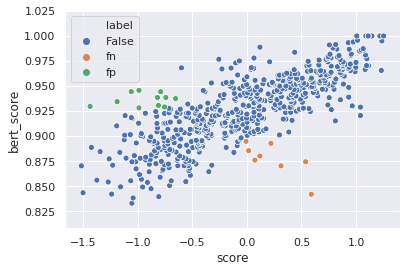

In [8]:
key = (2016, 'cs-en')
fp_and_fn(groups[key])

,reference,output,score,bert_score,label
3360,Currently the majority of staff are men.\n,At the moment the men predominate among the staff.\n,0.691142,0.903080,fn
3753,Originally this point was scheduled as a part of the agenda not open to the public.\n,This point had originally stood on the non public part of the agenda.\n,0.617161,0.915369,fn
3664,"Colleague Damien Collins MP attacked The Voice, saying that too wasn't original\n",Parliamentary colleague Damien Collins attacked the broadcast The Voice and said that this was not very original.\n,0.576145,0.907225,fn
3694,The next closest in enthusiasm?\n,The next in terms of enthusiasm?\n,0.547975,0.911701,fn
3806,One was a man of about 5ft 11in tall.\n,"One of the men was about 1,80 metres in size.\n",0.546305,0.880832,fn
3763,The markets in London and Paris also registered solid gains.\n,Solid profits was also recorded by the trading venues in London and Paris.\n,0.516482,0.916260,fn
3379,"Even though most data show the economy growing solidly, the recent turmoil in global financial markets could make already-cautious Fed officials skittish about adding to the volatility by raising ...","Although most of the economic data show that it is solid, the recent turmoil in global financial markets, the already cautious Fed officials are fearful that this volatility by increasing the inte...",0.440949,0.904065,fn
3523,The next closest in enthusiasm?\n,The next in terms of enthusiasm?\n,0.430553,0.911701,fn
3668,Since then a spit laden with meat and potatoes has been rotating in his shop.\n,"Since then a spit, which is equipped with Meat and Potatoes turns in his shop.\n",0.338006,0.916477,fn
3875,Under discussion will be the pilots' retirement scheme.\n,The talks should be the retirement scheme for pilots.\n,0.197186,0.913865,fn


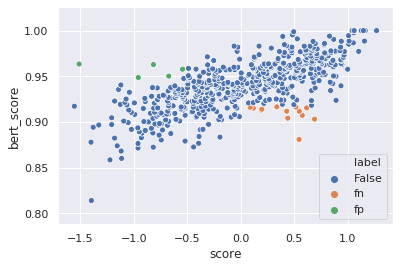

In [9]:
key = (2016, 'de-en')
fp_and_fn(groups[key])

,reference,output,score,bert_score,label
2499,"For the economy specifically, history offers little guide about timing.\n","The past doesn't give little help in terms of timing, particularly when it comes to the economy.\n",0.164132,0.885127,fn
2616,"The Wednesday's test in this autumn's matriculation examination was advanced foreign language, which for most is English.\n","Autumn Student writings was scheduled for Wednesday in a foreign language, the majority of which was in English.\n",0.157171,0.873535,fn
2584,The Union of Health and Social Care Professionals (Tehy) threatened with a strike and nurses’ mass resignations in 2007.\n,Tehy threatened a mass resignations and nurses in 2007.\n,0.140896,0.860761,fn
2341,"By the end of the day, there would be one more death: Lamb took his own life as police closed in on him.\n","By the end of the day, the number of deaths rose to yet another: Piirittäessä äntä Lamb committed suicide by police.\n",0.093284,0.885446,fn
2782,Contact us on Twitter\n,Contacted me via Twitter\n,0.017796,0.881752,fn
2464,"For her part, Mackay said last week's home visit dates made her realise Wood could be ""the one.""\n",Mackay said that last week's meeting received a home visit they realise that Wood could be 'right'.\n,-0.086691,0.885477,fn
2381,Hard to make any more excuses\n,It is no longer an excuse for\n,-0.092216,0.845711,fn
2500,"Even though most data show the economy growing solidly, the recent turmoil in global financial markets could make already-cautious Fed officials skittish about adding to the volatility by raising ...","Although the vast majority of the data shows the economy is growing steadily, recent turmoil in global financial markets may have already done in advance to guard against the central bank official...",-0.098845,0.876017,fn
2528,That means the next recession can be here as soon as by next autumn and the financial markets’ rate crash before tat.\n,"Thus, the next recession could weigh on the peak of the first by fall and the financial market rate ground before then.\n",-0.113773,0.887358,fn
2414,"The contract period changes at the turn of the year, with closed routes in the whole country.\n",The period of change at the turn of the year and the abolition of routes across the country.\n,-0.574067,0.926418,fp


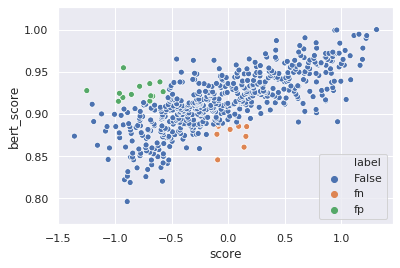

In [10]:
key = (2016, 'fi-en')
fp_and_fn(groups[key])

,reference,output,score,bert_score,label
927,The bodies of 29 of the worshipers killed when a crane crashed collapsed at Mecca's Grand Central Mosque were carried through the streets\n,"In a ceremony carried out on the street, hundreds of Muslims gathered to bury the 29 victims, killed because of a collapsed crane at the grand mosque in Mecca.\n",0.470899,0.900756,fn
803,LAX-C probably has it.\n,Probably found at LAX-C.\n,0.449264,0.866965,fn
838,Meeting between Crina and her biological mother and brother\n,Crinei meeting with biological mother and brother\n,0.287049,0.899527,fn
619,"FedEx earnings mixed, lowers fiscal 2016 outlook\n","FedEx gains are mixed, falling fiscal projections for 2016.\n",0.249780,0.882049,fn
824,"I wouldn't rule out an away win, either.\n",I would not eliminate any version of a victory away.\n,0.184559,0.906652,fn
783,Lopez has recommended parents and teachers use nonalcoholic products or sanitizing wipes short of moving hand sanitizer out of a child's reach.\n,Lopez advised parents and teachers to use products or wet tissue without alcohol and not to leave hands detergentul within reach of children.\n,0.157380,0.899005,fn
911,The centre we work at conducts various activities and most times we are associated with an institution that only deals with drug consumers or addicts.\n,"We, at the Centre, we have different activities, and often are associated as an institution which deals only with the consumer, people dependent on drugs.\n",0.142967,0.906840,fn
709,"Acting Mayor of Tuzla commune in Constanta county enjoyed this position for just a half an hour, due to DNA (National Anticorruption directorate) prosecutors.\n","The interim mayor of the canton of Constanta County has only enjoyed half an hour of office, due to DNA prosecutors.\n",0.125145,0.905142,fn
741,Resentment is currently growing in intensity.\n,"There is much resentment, which increase in intensity even during these weeks.\n",0.085888,0.895651,fn
901,"Although he came from a wealthy family of farmers, Brancusi lived a modest life, but one that provided his milestones which will guide his artistic vision later.\n","Although it came from a family of wealthy peasants, Brancusi leads a modest life, but one that would reap their benchmarks that will guide the artistic vision of the night.\n",-0.512500,0.941238,fp


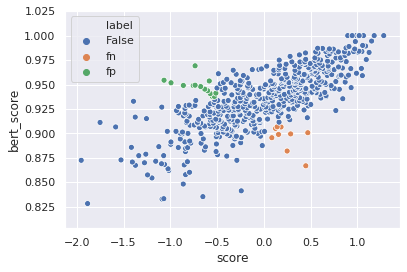

In [11]:
key = (2016, 'ro-en')
fp_and_fn(groups[key])

,reference,output,score,bert_score,label
1825,Scots unemployment remains unchanged as UK total rises\n,"Unemployment among Scots is not changing, whereas in the UK as a whole it grows\n",0.854974,0.867334,fn
1694,Sam Wood is keeping his lips firmly sealed until Thursday's finale\n,"Sam Wood steadfastly keeps silence before the final, which will take place on Thursday\n",0.525594,0.902218,fn
2213,"The second half-hour (5.30pm to 6pm) jumped to 623,000 viewers - enough for a small win over Eddie McGuire's Hot Seat (613,000).\n",The second of half-hour (17:30 to 18:00) number jumped to 623 000 spectators - it is sufficient for the minor victory above Hot Seat Eddie Poppy-Gvayra (613 000).\n,0.256847,0.897370,fn
2029,Can you see why that programme is often discussed because it is not original and it is not particularly distinctive?\n,"You do see, why this program frequently is discussed in connection with the absence of originality and distinguishing features?\n",0.256634,0.908412,fn
1690,The barbershop has been operating at this site for many years.\n,Barber is at this place for many years.\n,0.210616,0.901950,fn
2203,A police squad was called and arrived at the scene.\n,Police arrived at the place on call.\n,0.203664,0.904073,fn
2087,The Chase Australia is a replacement for Million Dollar Minute which failed to dent McGuire's show.\n,"Chase Australia - replacing Million Dollar Minute, which could not beat the show Mac Gvayra.\n",0.060385,0.889056,fn
1788,Ben Carson would lead the businessman by a wide 19 points in a hypothetical head-to-head.\n,"Ben Carson overtakes a businessman on the whole 19 points in a hypothetical contest ""one on one"".\n",0.055772,0.902486,fn
1749,"It's worth ensuring that your phone is charged or near a charger while the update happens, so that it doesn't run out of battery.\n",We should make sure that when upgrading your phone charged or is located next to the charger to prevent the discharge of the battery.\n,0.034431,0.896464,fn
2118,"While 48 percent of Democratic primary voters say they would enthusiastically back Clinton, fewer Republican voters say that about their frontrunner, Donald Trump (35 percent).\n","While 48 percent of the primary say they would enthusiastically support Clinton, fewer say the same about their leader, Prime Minister Donald (35 percent).\n",-0.561109,0.939959,fp


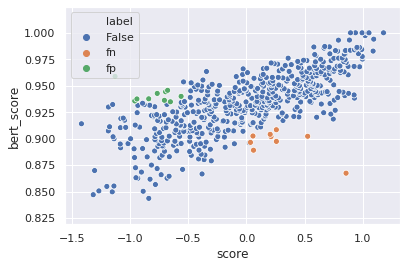

In [12]:
key = (2016, 'ru-en')
fp_and_fn(groups[key])

,reference,output,score,bert_score,label
2921,Message us on WhatsApp\n,Give us the message from WhatsApp atın\n,0.268420,0.820728,fn
2846,"""All wins are fun, no matter how it happens,"" Tigers manager Brad Ausmus said.\n","In the words of tigers Manager Brad ausmus, ""whatever triumph over all enjoyable.""\n",0.167863,0.842491,fn
3350,"It's hard to see them breaking a leg to help the Selfie Brits, whose energy might be better spent preventing Scotland leaving the UK - something they don't want either because most have similar se...","Energy must be used in order to prevent secession from scotland, the united kingdom, which is less likely to make the effort for britanyalilar selfie of this country because they do, because they ...",0.114198,0.860088,fn
3148,"Brisbane Broncos coach Wayne Bennett made a thinly veiled reference to the Storm after his side's qualifying final win over North Queensland Cowboys on Saturday night when he called that game a ""s...","Brisbane Broncos coach Wayne Bennett team Saturday night against the North Queensland Cowboys after winning the semifinal game Storm, to a much older non closed that match by sending ragbi ibretli...",0.063967,0.857498,fn
3002,"A financial crisis in Asia led the Fed to cut its benchmark rate by 0.75 percentage point over three meetings ""despite limited identifiable implications for U.S. growth,"" Lacker said.\n","Lacker said, ""the united states can be a definition of the limits to growth recommendations,"" the fed during the financial crisis in asia, the benchmark rate of the three sessions in has forced to...",0.030310,0.854669,fn
3191,"Expressing that one of the nutrients that can be consumed safely by everyone of every age is kefir, a miraculous nutrient which is more beneficial than its main base of milk and whose health benef...","The main item that does not end with the counting health benefits of milk, but miraculously every consumer of all ages certainly more beneficial than milk kefir thematic thematic is one of the tru...",-0.014132,0.854967,fn
2908,"""We're trying to get our students to come back,"" LaForge said.\n","LaForge Öğrencilerimizi said ""we are trying to bring back again,"" he said.\n",-0.030921,0.856830,fn
2989,Because honesty and honour are indisputable for us.\n,"Because the honour and the honour for us, it would not be discussed.\n",-0.052012,0.866330,fn
3251,Both admire them inwardly.\n,Inherent in both Fascinated.\n,-0.077222,0.863239,fn
3187,"Health officials surmised that the product contained methanol, a deadly agent, rather than ethyl alcohol, which was listed as the active ingredient.\n","Health officials, as stated on the list of matter in the right but deadly effect might be methyl alcohol with ethyl alcohol surmuthtu forward.\n",-0.157289,0.859945,fn


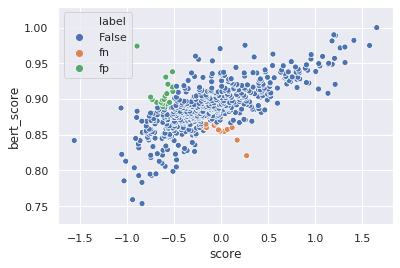

In [13]:
key = (2016, 'tr-en')
fp_and_fn(groups[key])

### bleurt

##### scatterplots

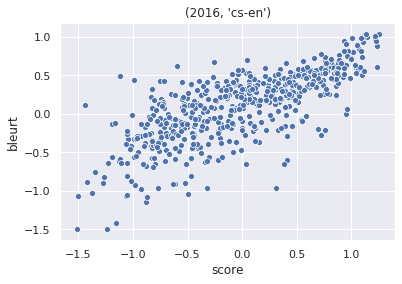

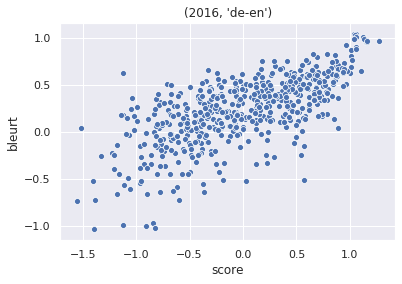

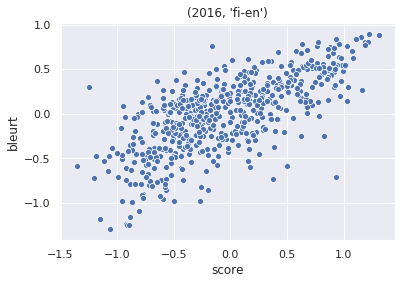

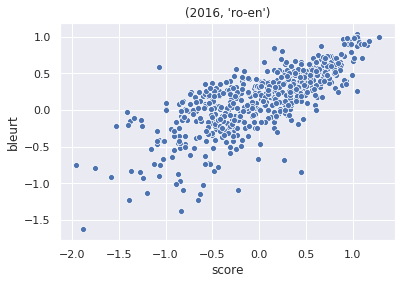

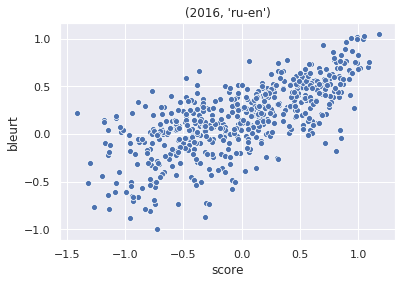

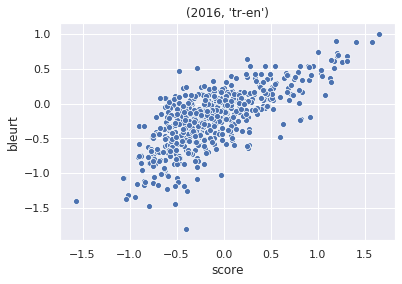

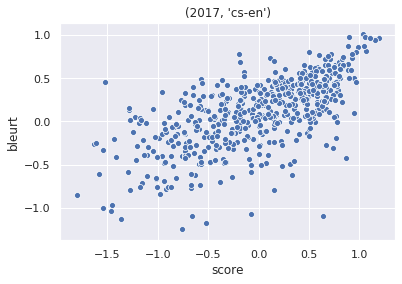

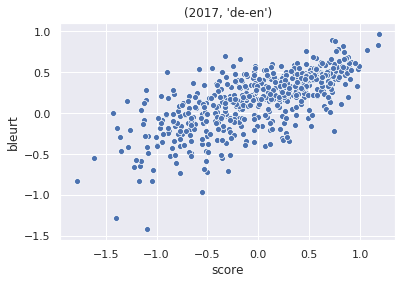

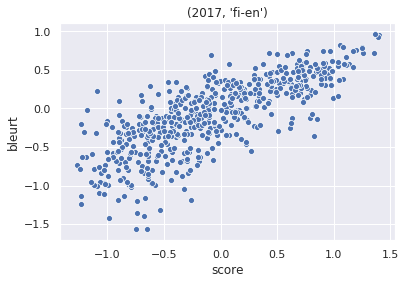

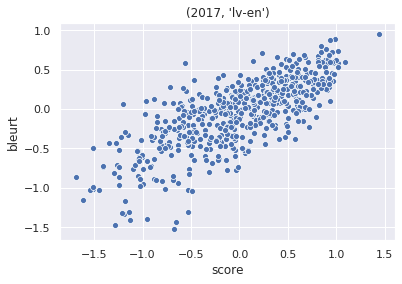

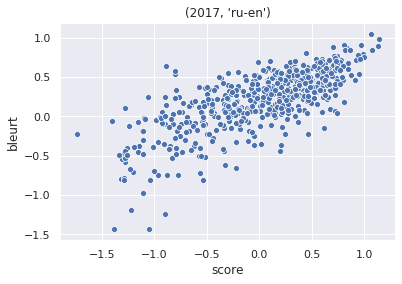

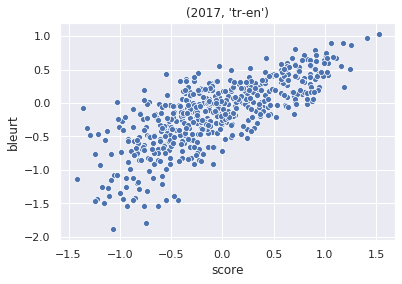

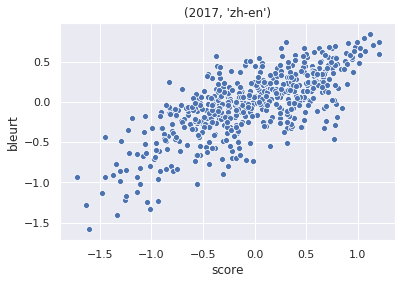

In [14]:
for i, group in wmt_mst_seg.groupby(['year', 'lp']):
    plt.figure()
    plt.title(str(i))
    sns.scatterplot(x=group.score, y=group.bleurt)

,reference,output,score,bleurt,label
1357,Reporting By Yasmeen Abutaleb; Editing by Christian Plumb\n,Story: Yasmeen Abutaleb; edit: Christian Plumb\n,0.589889,0.561274,fn
1513,Not in English of course.\n,But it was not English.\n,0.537894,-0.081428,fn
1530,Rumour Mill: No Celtic disharmony\n,Rumours: No discrepancy in team Celtic\n,0.312298,-0.962157,fn
1369,"However, by 1991 it wasn't producing any.\n","But in, 1991, made not one.\n",0.220114,-0.216039,fn
1217,Hughes was charged with three runs on six hits and a walk with four strikeouts.\n,"Hughes ran three bases, gained six hits and four strikes.\n",0.118796,0.136340,fn
1325,Having an exclusive status among suppliers to aviation manufacturers comes at a price.\n,Exclusive position between suppliers aircraft manufacturers is not free.\n,0.072905,-0.125714,fn
1497,"Healy also backed the decision to overlook Kyrgios for the important tie, starting on Friday, describing the ""mutual decision"" as the right thing for all, but backing the Canberran to return as a ...","Healy also supported decision overlook kyrgiose for important struggle, which beginning in Friday, and States, that ""mutual decision ""is right solution for all, but supports a native Canberra to r...",0.015991,0.155635,fn
1626,"""It really is individual and depends on the specific difficulties being suffered by the patient,"" says MUDr. Martina Kövári, senior consultant at the Physiotherapy and Physical Medicine Clinic of ...","""It's a very individual, depends on the patient's specific problems,"" says Dr. Martin Request, the rehabilitation and medicine in the hospital.\n",-0.008587,-0.469926,fn
1162,and that the superintendent had done very well when he pulled me out of the track brigade.\n,That the chief did very well when he pulled me out of the squad at the break.\n,-0.653573,-0.180166,fp
1124,Her support among men has dropped considerably and Sanders only trails her by 5 points.\n,Its support between men to significantly reduced and Sanders her loses only five points.\n,-0.742912,0.188890,fp


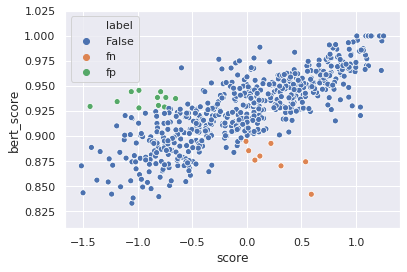

In [15]:
key = (2016, 'cs-en')
fp_and_fn(groups[key], metric='bleurt')

,reference,output,score,bleurt,label
3360,Currently the majority of staff are men.\n,At the moment the men predominate among the staff.\n,0.691142,0.289114,fn
3753,Originally this point was scheduled as a part of the agenda not open to the public.\n,This point had originally stood on the non public part of the agenda.\n,0.617161,0.235166,fn
3664,"Colleague Damien Collins MP attacked The Voice, saying that too wasn't original\n",Parliamentary colleague Damien Collins attacked the broadcast The Voice and said that this was not very original.\n,0.576145,0.139105,fn
3694,The next closest in enthusiasm?\n,The next in terms of enthusiasm?\n,0.547975,0.254330,fn
3806,One was a man of about 5ft 11in tall.\n,"One of the men was about 1,80 metres in size.\n",0.546305,-0.253404,fn
3763,The markets in London and Paris also registered solid gains.\n,Solid profits was also recorded by the trading venues in London and Paris.\n,0.516482,0.112834,fn
3379,"Even though most data show the economy growing solidly, the recent turmoil in global financial markets could make already-cautious Fed officials skittish about adding to the volatility by raising ...","Although most of the economic data show that it is solid, the recent turmoil in global financial markets, the already cautious Fed officials are fearful that this volatility by increasing the inte...",0.440949,0.127627,fn
3523,The next closest in enthusiasm?\n,The next in terms of enthusiasm?\n,0.430553,0.254330,fn
3668,Since then a spit laden with meat and potatoes has been rotating in his shop.\n,"Since then a spit, which is equipped with Meat and Potatoes turns in his shop.\n",0.338006,0.272020,fn
3875,Under discussion will be the pilots' retirement scheme.\n,The talks should be the retirement scheme for pilots.\n,0.197186,0.380825,fn


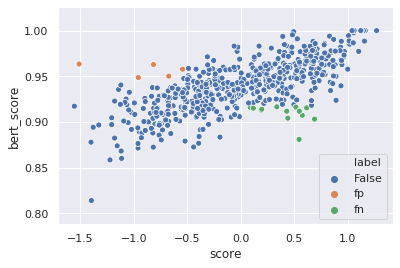

In [16]:
key = (2016, 'de-en')
fp_and_fn(groups[key], metric='bleurt')

,reference,output,score,bleurt,label
2499,"For the economy specifically, history offers little guide about timing.\n","The past doesn't give little help in terms of timing, particularly when it comes to the economy.\n",0.164132,-0.392938,fn
2616,"The Wednesday's test in this autumn's matriculation examination was advanced foreign language, which for most is English.\n","Autumn Student writings was scheduled for Wednesday in a foreign language, the majority of which was in English.\n",0.157171,-0.304387,fn
2584,The Union of Health and Social Care Professionals (Tehy) threatened with a strike and nurses’ mass resignations in 2007.\n,Tehy threatened a mass resignations and nurses in 2007.\n,0.140896,-0.218440,fn
2341,"By the end of the day, there would be one more death: Lamb took his own life as police closed in on him.\n","By the end of the day, the number of deaths rose to yet another: Piirittäessä äntä Lamb committed suicide by police.\n",0.093284,-0.208842,fn
2782,Contact us on Twitter\n,Contacted me via Twitter\n,0.017796,0.600547,fn
2464,"For her part, Mackay said last week's home visit dates made her realise Wood could be ""the one.""\n",Mackay said that last week's meeting received a home visit they realise that Wood could be 'right'.\n,-0.086691,-0.259826,fn
2381,Hard to make any more excuses\n,It is no longer an excuse for\n,-0.092216,-0.291220,fn
2500,"Even though most data show the economy growing solidly, the recent turmoil in global financial markets could make already-cautious Fed officials skittish about adding to the volatility by raising ...","Although the vast majority of the data shows the economy is growing steadily, recent turmoil in global financial markets may have already done in advance to guard against the central bank official...",-0.098845,-0.353573,fn
2528,That means the next recession can be here as soon as by next autumn and the financial markets’ rate crash before tat.\n,"Thus, the next recession could weigh on the peak of the first by fall and the financial market rate ground before then.\n",-0.113773,-0.573625,fn
2414,"The contract period changes at the turn of the year, with closed routes in the whole country.\n",The period of change at the turn of the year and the abolition of routes across the country.\n,-0.574067,-0.382696,fp


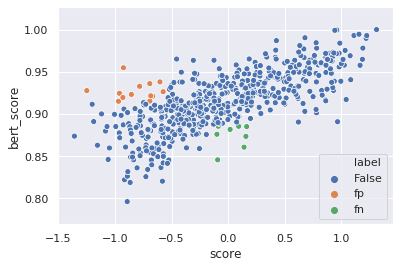

In [17]:
key = (2016, 'fi-en')
fp_and_fn(groups[key], metric='bleurt')

,reference,output,score,bleurt,label
927,The bodies of 29 of the worshipers killed when a crane crashed collapsed at Mecca's Grand Central Mosque were carried through the streets\n,"In a ceremony carried out on the street, hundreds of Muslims gathered to bury the 29 victims, killed because of a collapsed crane at the grand mosque in Mecca.\n",0.470899,-0.115732,fn
803,LAX-C probably has it.\n,Probably found at LAX-C.\n,0.449264,-0.842985,fn
838,Meeting between Crina and her biological mother and brother\n,Crinei meeting with biological mother and brother\n,0.287049,0.205379,fn
619,"FedEx earnings mixed, lowers fiscal 2016 outlook\n","FedEx gains are mixed, falling fiscal projections for 2016.\n",0.249780,0.244701,fn
824,"I wouldn't rule out an away win, either.\n",I would not eliminate any version of a victory away.\n,0.184559,0.165450,fn
783,Lopez has recommended parents and teachers use nonalcoholic products or sanitizing wipes short of moving hand sanitizer out of a child's reach.\n,Lopez advised parents and teachers to use products or wet tissue without alcohol and not to leave hands detergentul within reach of children.\n,0.157380,-0.157334,fn
911,The centre we work at conducts various activities and most times we are associated with an institution that only deals with drug consumers or addicts.\n,"We, at the Centre, we have different activities, and often are associated as an institution which deals only with the consumer, people dependent on drugs.\n",0.142967,0.067066,fn
709,"Acting Mayor of Tuzla commune in Constanta county enjoyed this position for just a half an hour, due to DNA (National Anticorruption directorate) prosecutors.\n","The interim mayor of the canton of Constanta County has only enjoyed half an hour of office, due to DNA prosecutors.\n",0.125145,-0.095072,fn
741,Resentment is currently growing in intensity.\n,"There is much resentment, which increase in intensity even during these weeks.\n",0.085888,0.303398,fn
901,"Although he came from a wealthy family of farmers, Brancusi lived a modest life, but one that provided his milestones which will guide his artistic vision later.\n","Although it came from a family of wealthy peasants, Brancusi leads a modest life, but one that would reap their benchmarks that will guide the artistic vision of the night.\n",-0.512500,0.021236,fp


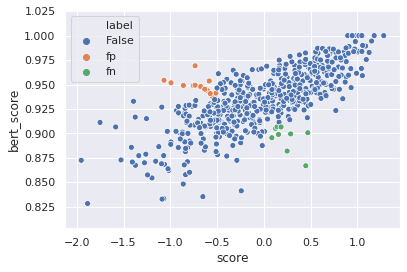

In [18]:
key = (2016, 'ro-en')
fp_and_fn(groups[key], metric='bleurt')

,reference,output,score,bleurt,label
1825,Scots unemployment remains unchanged as UK total rises\n,"Unemployment among Scots is not changing, whereas in the UK as a whole it grows\n",0.854974,-0.039927,fn
1694,Sam Wood is keeping his lips firmly sealed until Thursday's finale\n,"Sam Wood steadfastly keeps silence before the final, which will take place on Thursday\n",0.525594,0.095425,fn
2213,"The second half-hour (5.30pm to 6pm) jumped to 623,000 viewers - enough for a small win over Eddie McGuire's Hot Seat (613,000).\n",The second of half-hour (17:30 to 18:00) number jumped to 623 000 spectators - it is sufficient for the minor victory above Hot Seat Eddie Poppy-Gvayra (613 000).\n,0.256847,0.026142,fn
2029,Can you see why that programme is often discussed because it is not original and it is not particularly distinctive?\n,"You do see, why this program frequently is discussed in connection with the absence of originality and distinguishing features?\n",0.256634,0.239117,fn
1690,The barbershop has been operating at this site for many years.\n,Barber is at this place for many years.\n,0.210616,-0.242263,fn
2203,A police squad was called and arrived at the scene.\n,Police arrived at the place on call.\n,0.203664,0.419155,fn
2087,The Chase Australia is a replacement for Million Dollar Minute which failed to dent McGuire's show.\n,"Chase Australia - replacing Million Dollar Minute, which could not beat the show Mac Gvayra.\n",0.060385,-0.188468,fn
1788,Ben Carson would lead the businessman by a wide 19 points in a hypothetical head-to-head.\n,"Ben Carson overtakes a businessman on the whole 19 points in a hypothetical contest ""one on one"".\n",0.055772,-0.056575,fn
1749,"It's worth ensuring that your phone is charged or near a charger while the update happens, so that it doesn't run out of battery.\n",We should make sure that when upgrading your phone charged or is located next to the charger to prevent the discharge of the battery.\n,0.034431,-0.015502,fn
2118,"While 48 percent of Democratic primary voters say they would enthusiastically back Clinton, fewer Republican voters say that about their frontrunner, Donald Trump (35 percent).\n","While 48 percent of the primary say they would enthusiastically support Clinton, fewer say the same about their leader, Prime Minister Donald (35 percent).\n",-0.561109,0.132382,fp


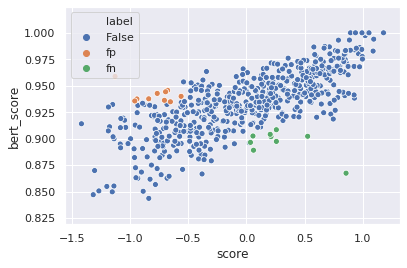

In [19]:
key = (2016, 'ru-en')
fp_and_fn(groups[key], metric='bleurt')

,reference,output,score,bleurt,label
2921,Message us on WhatsApp\n,Give us the message from WhatsApp atın\n,0.268420,-0.412620,fn
2846,"""All wins are fun, no matter how it happens,"" Tigers manager Brad Ausmus said.\n","In the words of tigers Manager Brad ausmus, ""whatever triumph over all enjoyable.""\n",0.167863,-0.048878,fn
3350,"It's hard to see them breaking a leg to help the Selfie Brits, whose energy might be better spent preventing Scotland leaving the UK - something they don't want either because most have similar se...","Energy must be used in order to prevent secession from scotland, the united kingdom, which is less likely to make the effort for britanyalilar selfie of this country because they do, because they ...",0.114198,-0.589835,fn
3148,"Brisbane Broncos coach Wayne Bennett made a thinly veiled reference to the Storm after his side's qualifying final win over North Queensland Cowboys on Saturday night when he called that game a ""s...","Brisbane Broncos coach Wayne Bennett team Saturday night against the North Queensland Cowboys after winning the semifinal game Storm, to a much older non closed that match by sending ragbi ibretli...",0.063967,-0.390123,fn
3002,"A financial crisis in Asia led the Fed to cut its benchmark rate by 0.75 percentage point over three meetings ""despite limited identifiable implications for U.S. growth,"" Lacker said.\n","Lacker said, ""the united states can be a definition of the limits to growth recommendations,"" the fed during the financial crisis in asia, the benchmark rate of the three sessions in has forced to...",0.030310,-0.121403,fn
3191,"Expressing that one of the nutrients that can be consumed safely by everyone of every age is kefir, a miraculous nutrient which is more beneficial than its main base of milk and whose health benef...","The main item that does not end with the counting health benefits of milk, but miraculously every consumer of all ages certainly more beneficial than milk kefir thematic thematic is one of the tru...",-0.014132,-0.442896,fn
2908,"""We're trying to get our students to come back,"" LaForge said.\n","LaForge Öğrencilerimizi said ""we are trying to bring back again,"" he said.\n",-0.030921,-0.202429,fn
2989,Because honesty and honour are indisputable for us.\n,"Because the honour and the honour for us, it would not be discussed.\n",-0.052012,-0.245794,fn
3251,Both admire them inwardly.\n,Inherent in both Fascinated.\n,-0.077222,-0.660280,fn
3187,"Health officials surmised that the product contained methanol, a deadly agent, rather than ethyl alcohol, which was listed as the active ingredient.\n","Health officials, as stated on the list of matter in the right but deadly effect might be methyl alcohol with ethyl alcohol surmuthtu forward.\n",-0.157289,-0.207641,fn


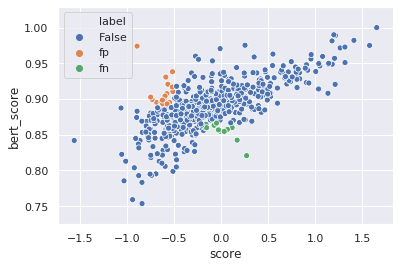

In [20]:
key = (2016, 'tr-en')
fp_and_fn(groups[key], metric='bleurt')